In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential #type: ignore
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D #type: ignore
import pickle
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models #type: ignore
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [38]:
X = pickle.load(open('X.pickle', 'rb'))
y = pickle.load(open('y.pickle', 'rb'))

In [33]:
model1 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 1)),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

history_1 = model1.fit(X, y, epochs=5, validation_split=0.2)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


624/624 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5249 - loss: 124.7894 - val_accuracy: 0.5208 - val_loss: 0.7049
Epoch 2/5
624/624 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5725 - loss: 0.6705 - val_accuracy: 0.5261 - val_loss: 0.7381
Epoch 3/5
624/624 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6202 - loss: 0.6178 - val_accuracy: 0.5251 - val_loss: 0.8785
Epoch 4/5
624/624 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6576 - loss: 0.5729 - val_accuracy: 0.5224 - val_loss: 1.0178
Epoch 5/5
624/624 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6886 - loss: 0.5338 - val_accuracy: 0.5204 - val_loss: 1.0763


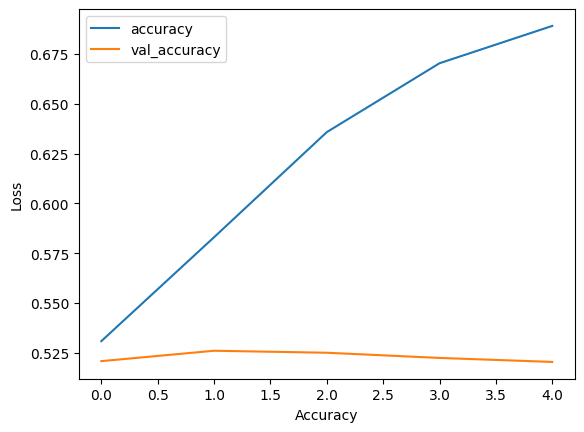

In [39]:
pd.DataFrame(history_1.history)[[
    'accuracy', 'val_accuracy'
]].plot()
plt.xlabel('Accuracy')
plt.ylabel('Loss')
plt.show()

In [37]:
tf.random.set_seed(42)
np.random.seed(42)

model2 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               loss='binary_crossentropy',
               metrics=['accuracy'])

history_2 = model2.fit(X, y, epochs=10, validation_split=0.2, batch_size=32)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.6255 - loss: 0.7786 - val_accuracy: 0.6960 - val_loss: 0.5772
Epoch 2/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7502 - loss: 0.5119 - val_accuracy: 0.7846 - val_loss: 0.4595
Epoch 3/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8009 - loss: 0.4253 - val_accuracy: 0.8028 - val_loss: 0.4108
Epoch 4/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8427 - loss: 0.3561 - val_accuracy: 0.7872 - val_loss: 0.4783
Epoch 5/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8686 - loss: 0.3027 - val_accuracy: 0.7872 - val_loss: 0.5151
Epoch 6/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8954 - loss: 0.2478 - val_accuracy: 0.7717 - val_loss: 0.7312
Epoch 7/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9166 - loss: 0.2027 - val_accuracy: 0.7517 - val_loss: 0.8959
Epoch 8/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9327 - loss: 0.1645 - val_accuracy: 

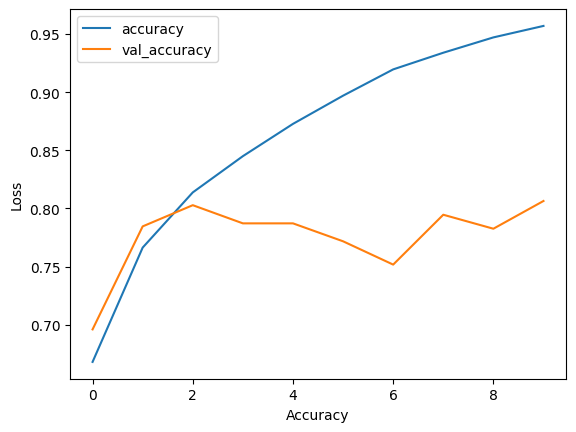

In [41]:
pd.DataFrame(history_2.history)[[
    'accuracy', 'val_accuracy'
]].plot()
plt.xlabel('Accuracy')
plt.ylabel('Loss')
plt.show()

In [42]:
X = X/ 255.0

In [43]:
tf.random.set_seed(42)
np.random.seed(42)

model3 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               loss='binary_crossentropy',
               metrics=['accuracy'])

history_3 = model3.fit(X, y, epochs=20, validation_split=0.2, batch_size=32)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


Exception ignored in: <function _xla_gc_callback at 0x796380733060>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
    
KeyboardInterrupt: 


624/624 ━━━━━━━━━━━━━━━━━━━━ 43s 11ms/step - accuracy: 0.5618 - loss: 1.6017 - val_accuracy: 0.6192 - val_loss: 0.6497
Epoch 2/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6258 - loss: 0.6488 - val_accuracy: 0.5868 - val_loss: 0.6893
Epoch 3/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6483 - loss: 0.6276 - val_accuracy: 0.7046 - val_loss: 0.5644
Epoch 4/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6967 - loss: 0.5784 - val_accuracy: 0.6447 - val_loss: 0.7528
Epoch 5/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7160 - loss: 0.5565 - val_accuracy: 0.6062 - val_loss: 0.8399
Epoch 6/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7355 - loss: 0.5271 - val_accuracy: 0.5543 - val_loss: 1.4776
Epoch 7/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7613 - loss: 0.5039 - val_accuracy: 0.7309 - val_loss: 0.5261
Epoch 8/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7634 - loss: 0.4905 - val_accuracy: 0.6072 - va

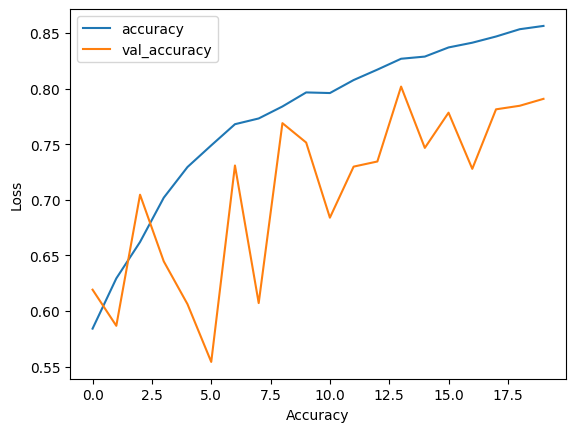

In [44]:
pd.DataFrame(history_3.history)[[
    'accuracy', 'val_accuracy'
]].plot()
plt.xlabel('Accuracy')
plt.ylabel('Loss')
plt.show()